In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
data = pd.read_csv("C:/Users/shashi/Downloads/melb_data.csv.zip")

# Display basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [3]:
# Data preprocessing
data = data.dropna()  # Remove rows with missing values
data = data[data['Price'] > 0]  # Remove rows with zero or negative prices
y = data['Price']
features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[features]
print(X.head())

   Rooms  Distance  Bedroom2  Bathroom  Landsize  BuildingArea  YearBuilt
1      2       2.5       2.0       1.0     156.0          79.0     1900.0
2      3       2.5       3.0       2.0     134.0         150.0     1900.0
4      4       2.5       3.0       1.0     120.0         142.0     2014.0
6      3       2.5       4.0       2.0     245.0         210.0     1910.0
7      2       2.5       2.0       1.0     256.0         107.0     1890.0


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X,y)
print("First in-sample predictions:", model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

# Make predictions on the testing data
predict = model.predict(X)#here taining and test data is same

# Calculate Mean Squared Error (MSE)
print(mean_absolute_error(y, predict))

First in-sample predictions: [1142482.15796448 1718828.9080041  1031425.31577842 1794532.56568378
 1250667.17722129]
Actual target values for those homes: [1035000.0, 1465000.0, 1600000.0, 1876000.0, 1636000.0]
296246.89638463274


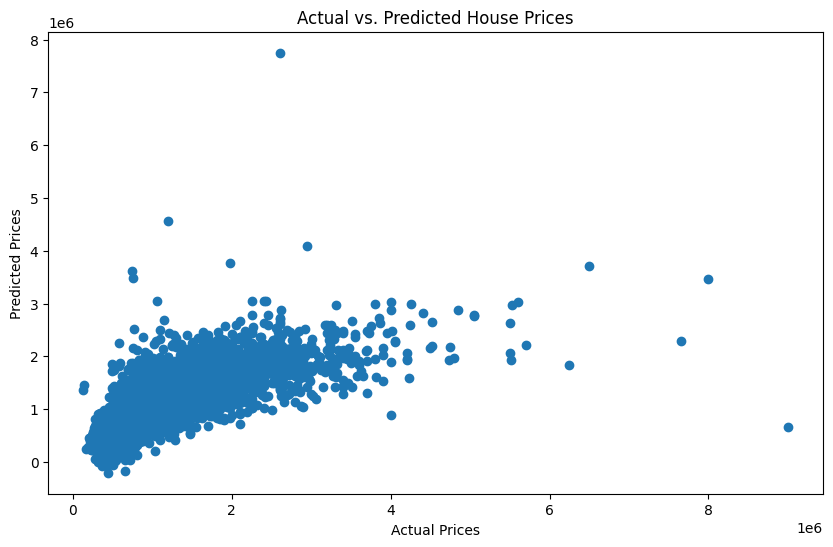

In [7]:
# Visualize predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y, predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [9]:
# Now splitting training data and test data to get better results of our prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
new_predict = model.predict(X_test)
print(mean_absolute_error(y_test, new_predict))

296505.6027728743


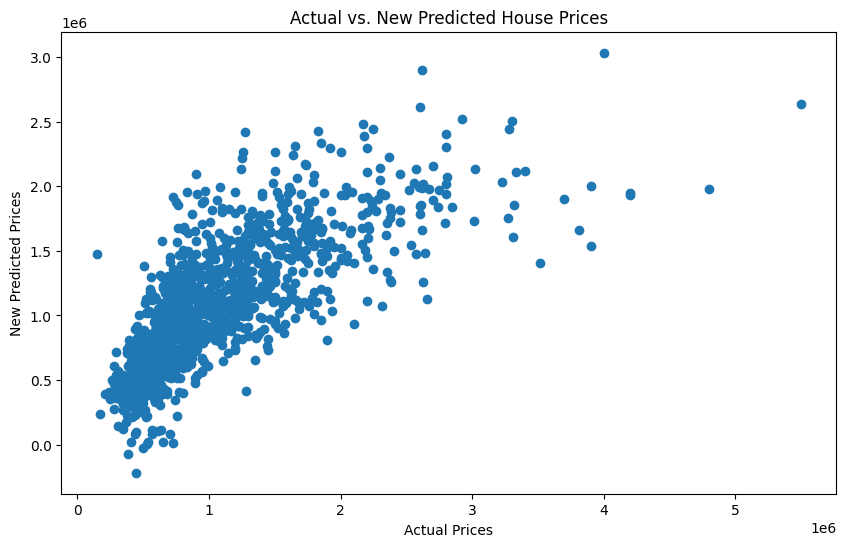

In [10]:
# Visualize new predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, new_predict)
plt.xlabel("Actual Prices")
plt.ylabel("New Predicted Prices")
plt.title("Actual vs. New Predicted House Prices")
plt.show()